# Q.1]  Delivery_time -> Predict delivery time using sorting time 

In [40]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [32]:
deliveryData = pd.read_csv('delivery_time.csv')

In [3]:
deliveryData.head()
# concluding from problem statement
# 'Sorting Time' is feature
# 'Delivery Time' is target

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
deliveryData.info()
# both columns are of numerical dtype
# no null values present
# implies no need to perform imputation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [33]:
# storing feature data in X
X = deliveryData[['Sorting Time']]

In [34]:
# storing target data in Y
Y = deliveryData[['Delivery Time']]

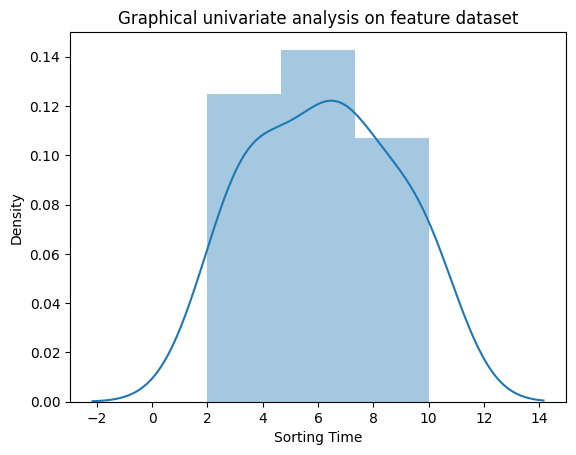

In [7]:
# Graphical univariate analysis on feature dataset
sns.distplot(X,kde=True)
plt.xlabel('Sorting Time')
plt.title('Graphical univariate analysis on feature dataset')
plt.show() 
# no outliers present 

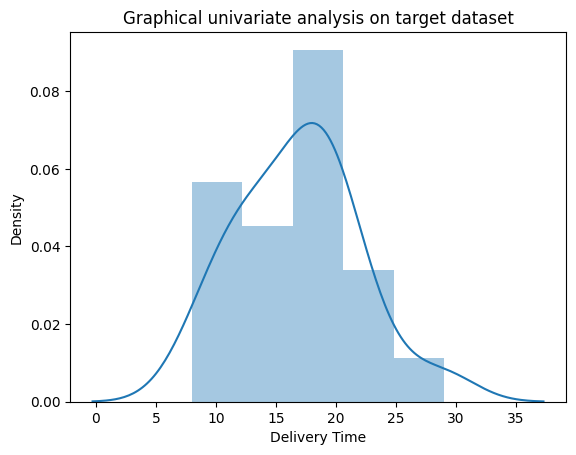

In [8]:
# Graphical univariate analysis on target dataset
sns.distplot(Y,kde=True)
plt.xlabel('Delivery Time')
plt.title('Graphical univariate analysis on target dataset')
plt.show()
# no outliers present 

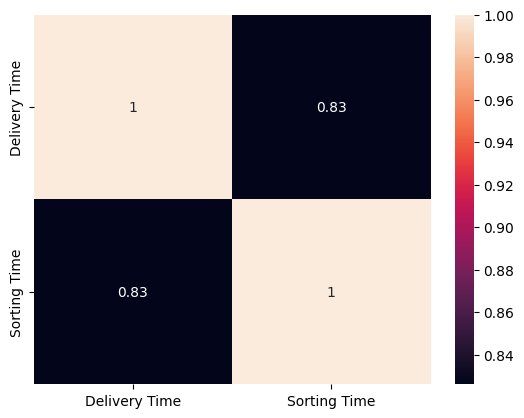

In [9]:
# bivariate analysis
# checking for correlation between variables
sns.heatmap(deliveryData.corr(),annot=True)
plt.show()
# there exists correlation between feature and target

## first model

In [14]:
# first model using ols 
# without transformations on feature dataset
model1 = smf.ols(formula='Q("Delivery Time") ~ Q("Sorting Time")',
               data=deliveryData).fit()

In [15]:
eps, beta = model1.params

In [16]:
print('intercept of best fitted line is ',eps)
print('coefficient of feature is ',beta)

intercept of best fitted line is  6.5827339719970555
coefficient of feature is  1.649019896831246


In [17]:
# 'X' is 'sorting_time'(feature)
# 'y_hat' is predicted value of 'delivery_time'(target)
y_hat = beta*X + eps

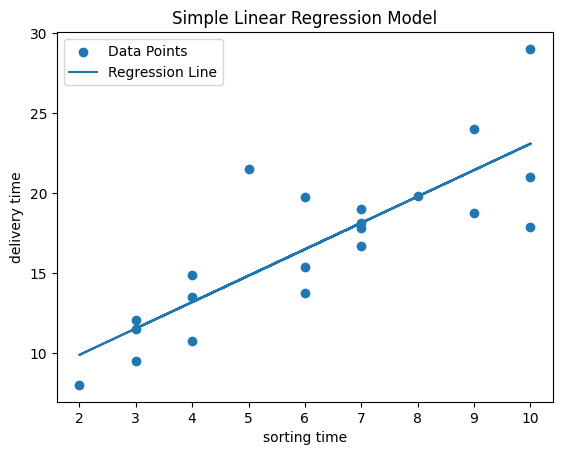

In [19]:
# plotting regression line
plt.scatter(deliveryData['Sorting Time'],deliveryData['Delivery Time'],label='Data Points')
plt.title('Simple Linear Regression Model')
plt.xlabel('sorting time')
plt.ylabel('delivery time')
plt.plot(X,y_hat,label='Regression Line')
plt.legend()
plt.show()

In [20]:
print(f'training accuracy of model1 is {round(model1.rsquared*100,2)} %')

training accuracy of model1 is 68.23 %


## training accuracy of model1 is 68.23 %

## second model

In [21]:
# performing transformation on target 
new_Y = Y**0.5

In [25]:
# new dataframe of dataset after transformation 
newData = pd.DataFrame({'Sorting Time':X.values.ravel(),
                        'Delivery Time':new_Y.values.ravel()},
                         index=deliveryData.index)

In [27]:
# second model with ols 
# with transformation of target dataset 
model2 = smf.ols(formula='Q("Delivery Time") ~ Q("Sorting Time")',
               data=newData).fit()

In [28]:
eps, beta = model2.params

In [29]:
print('intercept of best fitted line is ',eps)
print('coefficient of feature is ',beta)

intercept of best fitted line is  2.772731039345034
coefficient of feature is  0.20663181804577496


In [43]:
# 'Y' is delivery_time(target)
# 'X' is 'sorting_time'(feature)
y_hat = (beta*X + eps)**2

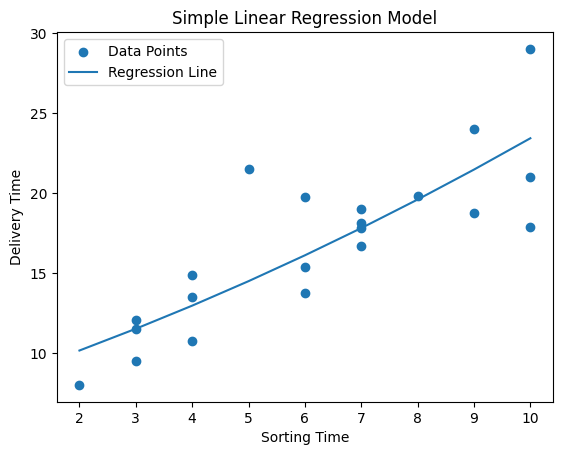

In [44]:
# plotting regression line
x_sorted = X['Sorting Time'].unique()
x_sorted.sort()
y_p = (beta*x_sorted + eps)**2
plt.scatter(deliveryData['Sorting Time'],deliveryData['Delivery Time'],label='Data Points')
plt.title('Simple Linear Regression Model')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.plot(x_sorted,y_p,label='Regression Line')
plt.legend()
plt.show()

In [38]:
print(f'training accuracy of model2 is {round(model2.rsquared*100,2)} %')

training accuracy of model2 is 70.4 %


## training accuracy of model2 is 70.4 %

## Third model 

In [41]:
# third model with OLS
# without transformation on target dataset
# without adding constant 
model3 = sm.OLS(Y,X).fit()

In [45]:
y_pred = model3.predict(X)

In [46]:
beta = model3.params[0]

In [47]:
print('coefficient of feature is ',beta)

coefficient of feature is  2.56524625267666


In [48]:
# 'X' is 'years_experience'(feature)
# 'y_hat' is predicted value of 'salary'(target)
y_hat = beta*X 

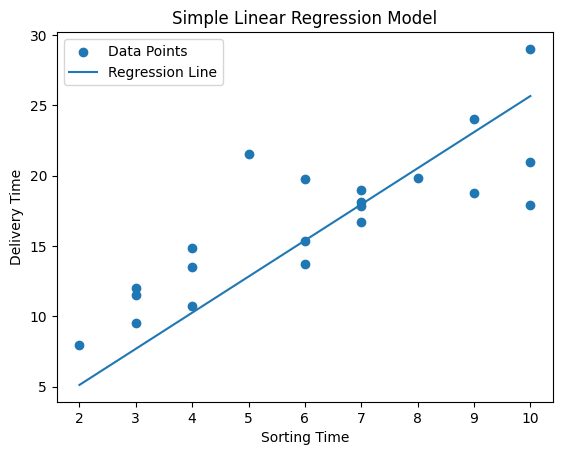

In [50]:
# plotting regression line
x_sorted = X['Sorting Time'].unique()
x_sorted.sort()
y_p = (beta*x_sorted)
plt.scatter(deliveryData['Sorting Time'],deliveryData['Delivery Time'],label='Data Points')
plt.title('Simple Linear Regression Model')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.plot(x_sorted,y_p,label='Regression Line')
plt.legend()
plt.show()

In [51]:
score = r2_score(Y,y_hat)

In [52]:
print(f'training accuracy of model3 is {round(score*100,2)} %')

training accuracy of model3 is 43.78 %


## training accuracy of model3 is 43.78 %

## since model2 have highest accuracy. we will select that as our final model.